In [1]:
import tensorflow as tf
import model_gen
import os
import configurations
from preprocessing import Label
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import math
import matplotlib.pyplot as plt
import utility
import cv2

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
config = configurations.Configuration()
label = Label()
util = utility.Util()

In [4]:
df = util.get_dataframe()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14679 entries, 0 to 14678
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_names  14679 non-null  object
 1   x_1         14679 non-null  int32 
 2   y_1         14679 non-null  int32 
 3   x_2         14679 non-null  int32 
 4   y_2         14679 non-null  int32 
 5   x_3         14679 non-null  int32 
 6   y_3         14679 non-null  int32 
 7   x_4         14679 non-null  int32 
 8   y_4         14679 non-null  int32 
 9   x_5         14679 non-null  int32 
 10  y_5         14679 non-null  int32 
 11  x_6         14679 non-null  int32 
 12  y_6         14679 non-null  int32 
 13  x_7         14679 non-null  int32 
 14  y_7         14679 non-null  int32 
 15  x_8         14679 non-null  int32 
 16  y_8         14679 non-null  int32 
 17  x_9         14679 non-null  int32 
 18  y_9         14679 non-null  int32 
 19  x_10        14679 non-null  int32 
 20  y_10  

In [6]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=config.VALIDATION_RATIO)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=os.path.join(config.IMAGES_BASE_DIR, "train"),
    x_col="file_names",
    y_col=util.get_column_names(),
    target_size=config.INPUT_DIMS[:2],
    class_mode="multi_output",
    batch_size=config.BATCH_SIZE,
    subset="training"
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=os.path.join(config.IMAGES_BASE_DIR, "train"),
    x_col="file_names",
    y_col=util.get_column_names(),
    target_size=config.INPUT_DIMS[:2],
    class_mode="multi_output",
    batch_size=config.BATCH_SIZE,
    subset="validation"
)

Found 11744 validated image filenames.
Found 2935 validated image filenames.


In [7]:
STEPS_PER_EPOCH = (config.LEN_TRAIN_SPLIT // config.BATCH_SIZE)
VALIDATION_STEPS = (config.LEN_VALIDATION_SPLIT // config.BATCH_SIZE)

In [8]:
STEPS_PER_EPOCH

367

In [9]:
VALIDATION_STEPS

91

In [10]:
model_gen = model_gen.Model()

In [11]:
#model = tf.keras.models.load_model("models/model_v4/")

In [12]:
model = model_gen.create_model_v2()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [14]:
model_gen.compile(model)

In [15]:
history = model.fit(
    x=train_generator,
    batch_size=config.BATCH_SIZE,
    epochs=config.EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=VALIDATION_STEPS
)

Epoch 1/15
367/367 [==============================] - 230s 603ms/step - loss: 333.0810 - val_loss: 311.9833
Epoch 2/15
367/367 [==============================] - 215s 586ms/step - loss: 302.0616 - val_loss: 291.8268
Epoch 3/15
367/367 [==============================] - 214s 583ms/step - loss: 286.5603 - val_loss: 290.9516
Epoch 4/15
367/367 [==============================] - 216s 587ms/step - loss: 269.9187 - val_loss: 272.8366
Epoch 5/15
367/367 [==============================] - 215s 585ms/step - loss: 253.5876 - val_loss: 272.8952
Epoch 6/15
367/367 [==============================] - 211s 574ms/step - loss: 236.1953 - val_loss: 273.2241
Epoch 7/15
367/367 [==============================] - 214s 584ms/step - loss: 209.8608 - val_loss: 263.8180
Epoch 8/15
367/367 [==============================] - 207s 563ms/step - loss: 179.4681 - val_loss: 267.1845
Epoch 9/15
367/367 [==============================] - 212s 578ms/step - loss: 151.3094 - val_loss: 261.1949
Epoch 10/15
367/367 [=======

In [16]:
model.save("model_v6")

INFO:tensorflow:Assets written to: model_v6\assets


INFO:tensorflow:Assets written to: model_v6\assets


In [17]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

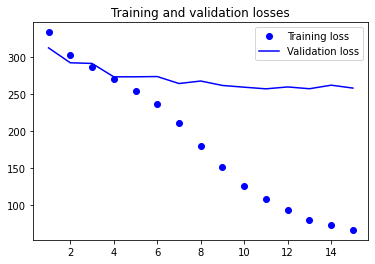

<Figure size 432x288 with 0 Axes>

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.legend()
plt.figure()
plt.show()
